# Kullback-Leibler (KL) Divergence Loss

## Definition

The **Kullback-Leibler (KL) divergence** is a measure of how one probability distribution diverges from a second, expected probability distribution. It quantifies the "distance" between two distributions, though it is not technically a true distance since it is not symmetric. The formula for KL divergence between two distributions \( P \) and \( Q \) is:

$$
D_{\text{KL}}(P \parallel Q) = \sum_{i} P(x_i) \log \frac{P(x_i)}{Q(x_i)}
$$

For continuous distributions, this becomes:

$$
D_{\text{KL}}(P \parallel Q) = \int p(x) \log \frac{p(x)}{q(x)} dx
$$

Where:
- \( P(x) \) is the true distribution (often the target or ground truth).
- \( Q(x) \) is the approximate distribution (usually the predicted distribution).
- The KL divergence tells us how much information is lost when using \( Q \) to approximate \( P \).

## Intuitive Explanation

KL divergence can be thought of as the **extra surprise** or **extra information** that we gain when using \( Q \) to represent \( P \), instead of using \( P \) directly. If the two distributions are identical, then \( D_{\text{KL}}(P \parallel Q) = 0 \), meaning there's no "extra surprise." If they differ, the divergence will be greater, indicating more error or inefficiency in the approximation.

In machine learning, we minimize the KL divergence to make the predicted distribution \( Q \) as close as possible to the true distribution \( P \). This loss encourages the model to adjust its predictions to more closely match the actual data distribution.

## Link to Cross-Entropy Loss

The **cross-entropy loss** is closely related to KL divergence. In fact, when we have a true distribution \( P \) and a predicted distribution \( Q \), the cross-entropy loss between them is defined as:

$$
H(P, Q) = - \sum_{i} P(x_i) \log Q(x_i)
$$

We can express the cross-entropy loss in terms of KL divergence as follows:

$$
H(P, Q) = D_{\text{KL}}(P \parallel Q) + H(P)
$$

Where \( H(P) \) is the entropy of the true distribution \( P \), representing the uncertainty of \( P \). Thus, minimizing cross-entropy loss is equivalent to minimizing the KL divergence plus the entropy of the true distribution, which is a constant with respect to the predictions. Therefore, minimizing cross-entropy effectively reduces KL divergence.

In classification problems, **cross-entropy** is commonly used as the loss function because it directly relates to the likelihood of the model's predictions, while KL divergence provides more of a measure of distance between two distributions.

### Examples

bernoulli cross entropy example.

In [1]:
import numpy as np

# Define two categorical distributions P and Q
P = np.array([0.4, 0.6])
Q = np.array([0.5, 0.5])

# Calculate KL divergence
kl_divergence = np.sum(P * np.log(P / Q))
print(f"KL Divergence: {kl_divergence}")

# Calculate entropy of P
entropy_P = -np.sum(P * np.log(P))
print(f"Entropy of P: {entropy_P}")

# Calculate cross-entropy between P and Q
cross_entropy = -np.sum(P * np.log(Q))
print(f"Cross-Entropy: {cross_entropy}")

# Verify that cross-entropy is equal to KL divergence plus entropy of P
assert np.isclose(cross_entropy, kl_divergence + entropy_P), "Cross-entropy is not equal to KL divergence plus entropy of P"
print("Cross-entropy is equal to KL divergence plus entropy of P")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
KL Divergence: 0.020135513550688863
Entropy of P: 0.6730116670092565
Cross-Entropy: 0.6931471805599453
Cross-entropy is equal to KL divergence plus entropy of P


### KL Divergence of Normal and Poisson Distributions

/var/folders/p9/vwq0gfs15vb07tg6xw1r14180000gn/T/ipykernel_98622/1719225225.py:23: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  kl_divergence = np.sum(poisson_dist.pmf(k) * np.log(poisson_dist.pmf(k) / normal_dist.pdf(k)) for k in range(0, 100))


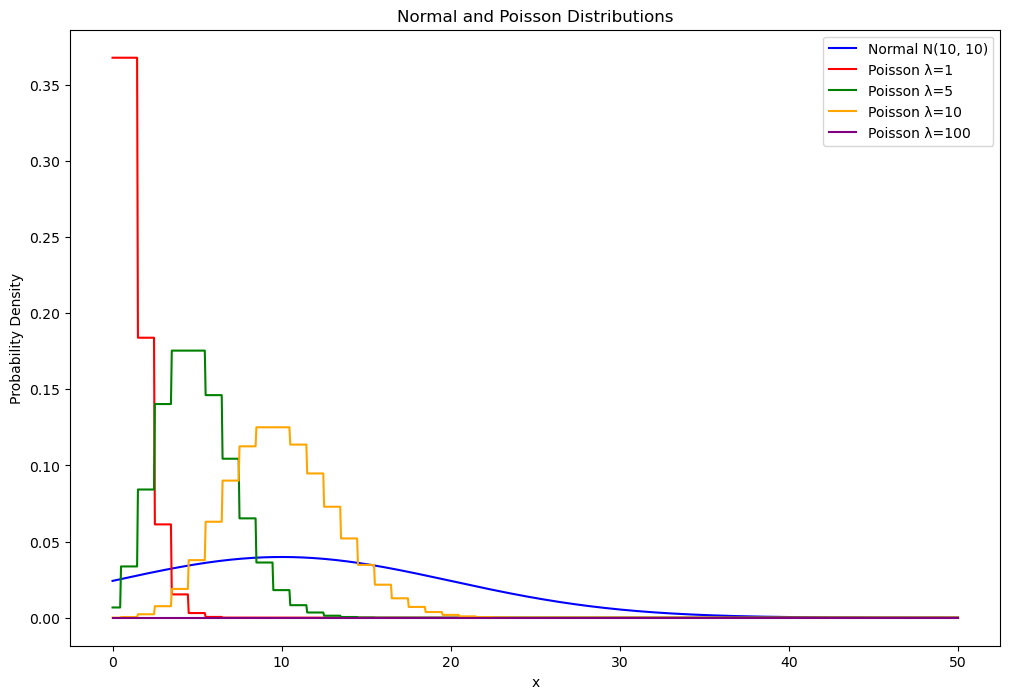

KL Divergence between N(10, 10) and Poisson(λ=1): 2.3266813839424683
KL Divergence between N(10, 10) and Poisson(λ=5): 1.1671283827703494
KL Divergence between N(10, 10) and Poisson(λ=10): 0.7101136909238133
KL Divergence between N(10, 10) and Poisson(λ=100): 16.13100028804208


In [2]:
import numpy as np
from scipy.stats import norm, poisson

import matplotlib.pyplot as plt

# Define the parameters for the normal distribution
mu_P = 10
sigma_P = 10

# Define the lambda values for the Poisson distribution
lambda_values = [1, 5, 10, 100]

# Calculate the KL divergence for each lambda
kl_divergences = []
for lam in lambda_values:
    # Define the Poisson distribution
    poisson_dist = poisson(mu=lam)
    
    # Define the Normal distribution
    normal_dist = norm(loc=mu_P, scale=sigma_P)
    
    # Calculate the KL divergence
    kl_divergence = np.sum(poisson_dist.pmf(k) * np.log(poisson_dist.pmf(k) / normal_dist.pdf(k)) for k in range(0, 100))
    kl_divergences.append(kl_divergence)

# Plot the distributions
x = np.linspace(0, 50, 1000)
plt.figure(figsize=(12, 8))

# Plot the Normal distribution
plt.plot(x, norm.pdf(x, mu_P, sigma_P), label=f'Normal N({mu_P}, {sigma_P})', color='blue')

# Plot the Poisson distributions
colors = ['red', 'green', 'orange', 'purple']
for lam, color in zip(lambda_values, colors):
    plt.plot(x, poisson.pmf(np.round(x), mu=lam), label=f'Poisson λ={lam}', color=color)

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.title('Normal and Poisson Distributions')
plt.legend()
plt.show()

# Print the KL divergences
for lam, kl_div in zip(lambda_values, kl_divergences):
    print(f"KL Divergence between N(10, 10) and Poisson(λ={lam}): {kl_div}")

#### KL Divergence and Cross-Entropy for Normal Distributions

Let's consider two normal distributions \( P \) and \( Q \) with means \( \mu_P \), \( \mu_Q \) and standard deviations \( \sigma_P \), \( \sigma_Q \).

If we try to get the entropy using sympy, we get close:

In [4]:
# Define symbols
x, mu, sigma = sp.symbols('x mu sigma')

# Define the pdf of the normal distribution
pdf = (1 / (sigma * sp.sqrt(2 * sp.pi))) * sp.exp(-((x - mu)**2) / (2 * sigma**2))

# Define the entropy integral
entropy_integral = -sp.integrate(pdf * sp.log(pdf), (x, -sp.oo, sp.oo))

# Simplify the result
entropy_simplified = sp.simplify(entropy_integral)
print(f"Entropy of the normal distribution: {entropy_simplified}")

Entropy of the normal distribution: Piecewise((nan, Eq((-2*log(exp(-mu**2/(2*sigma**2))/sigma) + log(2*pi))*exp(-mu**2/(2*sigma**2))/sigma, 0)), (oo*(1 - log(exp(-mu**2/(2*sigma**2))/sigma))*exp(-mu**2/(2*sigma**2))/(sigma*Abs((2*log(exp(-mu**2/(2*sigma**2))/sigma) - log(2*pi))/sigma)), True))


The entropy of a normal distribution can be verified to be:

$$
H(P) = \frac{1}{2} \log(2 \pi e \sigma_P^2)
$$

The KL divergence between two normal distributions is given by:

$$
D_{\text{KL}}(P \parallel Q) = \log \frac{\sigma_Q}{\sigma_P} + \frac{\sigma_P^2 + (\mu_P - \mu_Q)^2}{2\sigma_Q^2} - \frac{1}{2}
$$

We will use `sympy` to calculate the KL divergence and show that it is equal to the cross-entropy plus the entropy of \( P \).


In this example, we have used `sympy` to symbolically calculate the KL divergence, entropy, and cross-entropy for two normal distributions. The calculations confirm that the cross-entropy is equal to the KL divergence plus the entropy of \( P \).

In [5]:
import sympy as sp

# Define symbols
mu_P, mu_Q, sigma_P, sigma_Q = sp.symbols('mu_P mu_Q sigma_P sigma_Q')

# KL divergence formula for normal distributions
kl_divergence = sp.log(sigma_Q / sigma_P) + (sigma_P**2 + (mu_P - mu_Q)**2) / (2 * sigma_Q**2) - sp.Rational(1, 2)
kl_divergence_simplified = sp.simplify(kl_divergence)
print(f"KL Divergence: {kl_divergence_simplified}")

# Entropy of P
entropy_P = sp.log(sigma_P * sp.sqrt(2 * sp.pi * sp.exp(1)))
print(f"Entropy of P: {entropy_P}")

# Cross-entropy between P and Q
cross_entropy = entropy_P + kl_divergence
cross_entropy_simplified = sp.simplify(cross_entropy)
print(f"Cross-Entropy: {cross_entropy_simplified}")

# Verify that cross-entropy is equal to KL divergence plus entropy of P
assert sp.simplify(cross_entropy - (kl_divergence + entropy_P)) == 0, "Cross-entropy is not equal to KL divergence plus entropy of P"
print("Cross-entropy is equal to KL divergence plus entropy of P")

KL Divergence: (sigma_P**2 + sigma_Q**2*(2*log(sigma_Q/sigma_P) - 1) + (mu_P - mu_Q)**2)/(2*sigma_Q**2)
Entropy of P: log(sqrt(2)*sqrt(pi)*sigma_P*exp(1/2))
Cross-Entropy: (sigma_P**2 + sigma_Q**2*(2*log(sigma_P) + 2*log(sigma_Q/sigma_P) + log(2) + log(pi)) + (mu_P - mu_Q)**2)/(2*sigma_Q**2)
Cross-entropy is equal to KL divergence plus entropy of P
